In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore

In [50]:
df=pd.read_csv('/content/wisc_bc_data.csv')

In [51]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [52]:
df.drop('id',axis=1,inplace=True)

In [53]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [54]:
df.shape

(569, 31)

In [55]:
df.isnull().sum()

diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [56]:
df.dtypes

diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [57]:
df['diagnosis']=df['diagnosis'].astype('category')

In [58]:
df.iloc[:,1:].describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


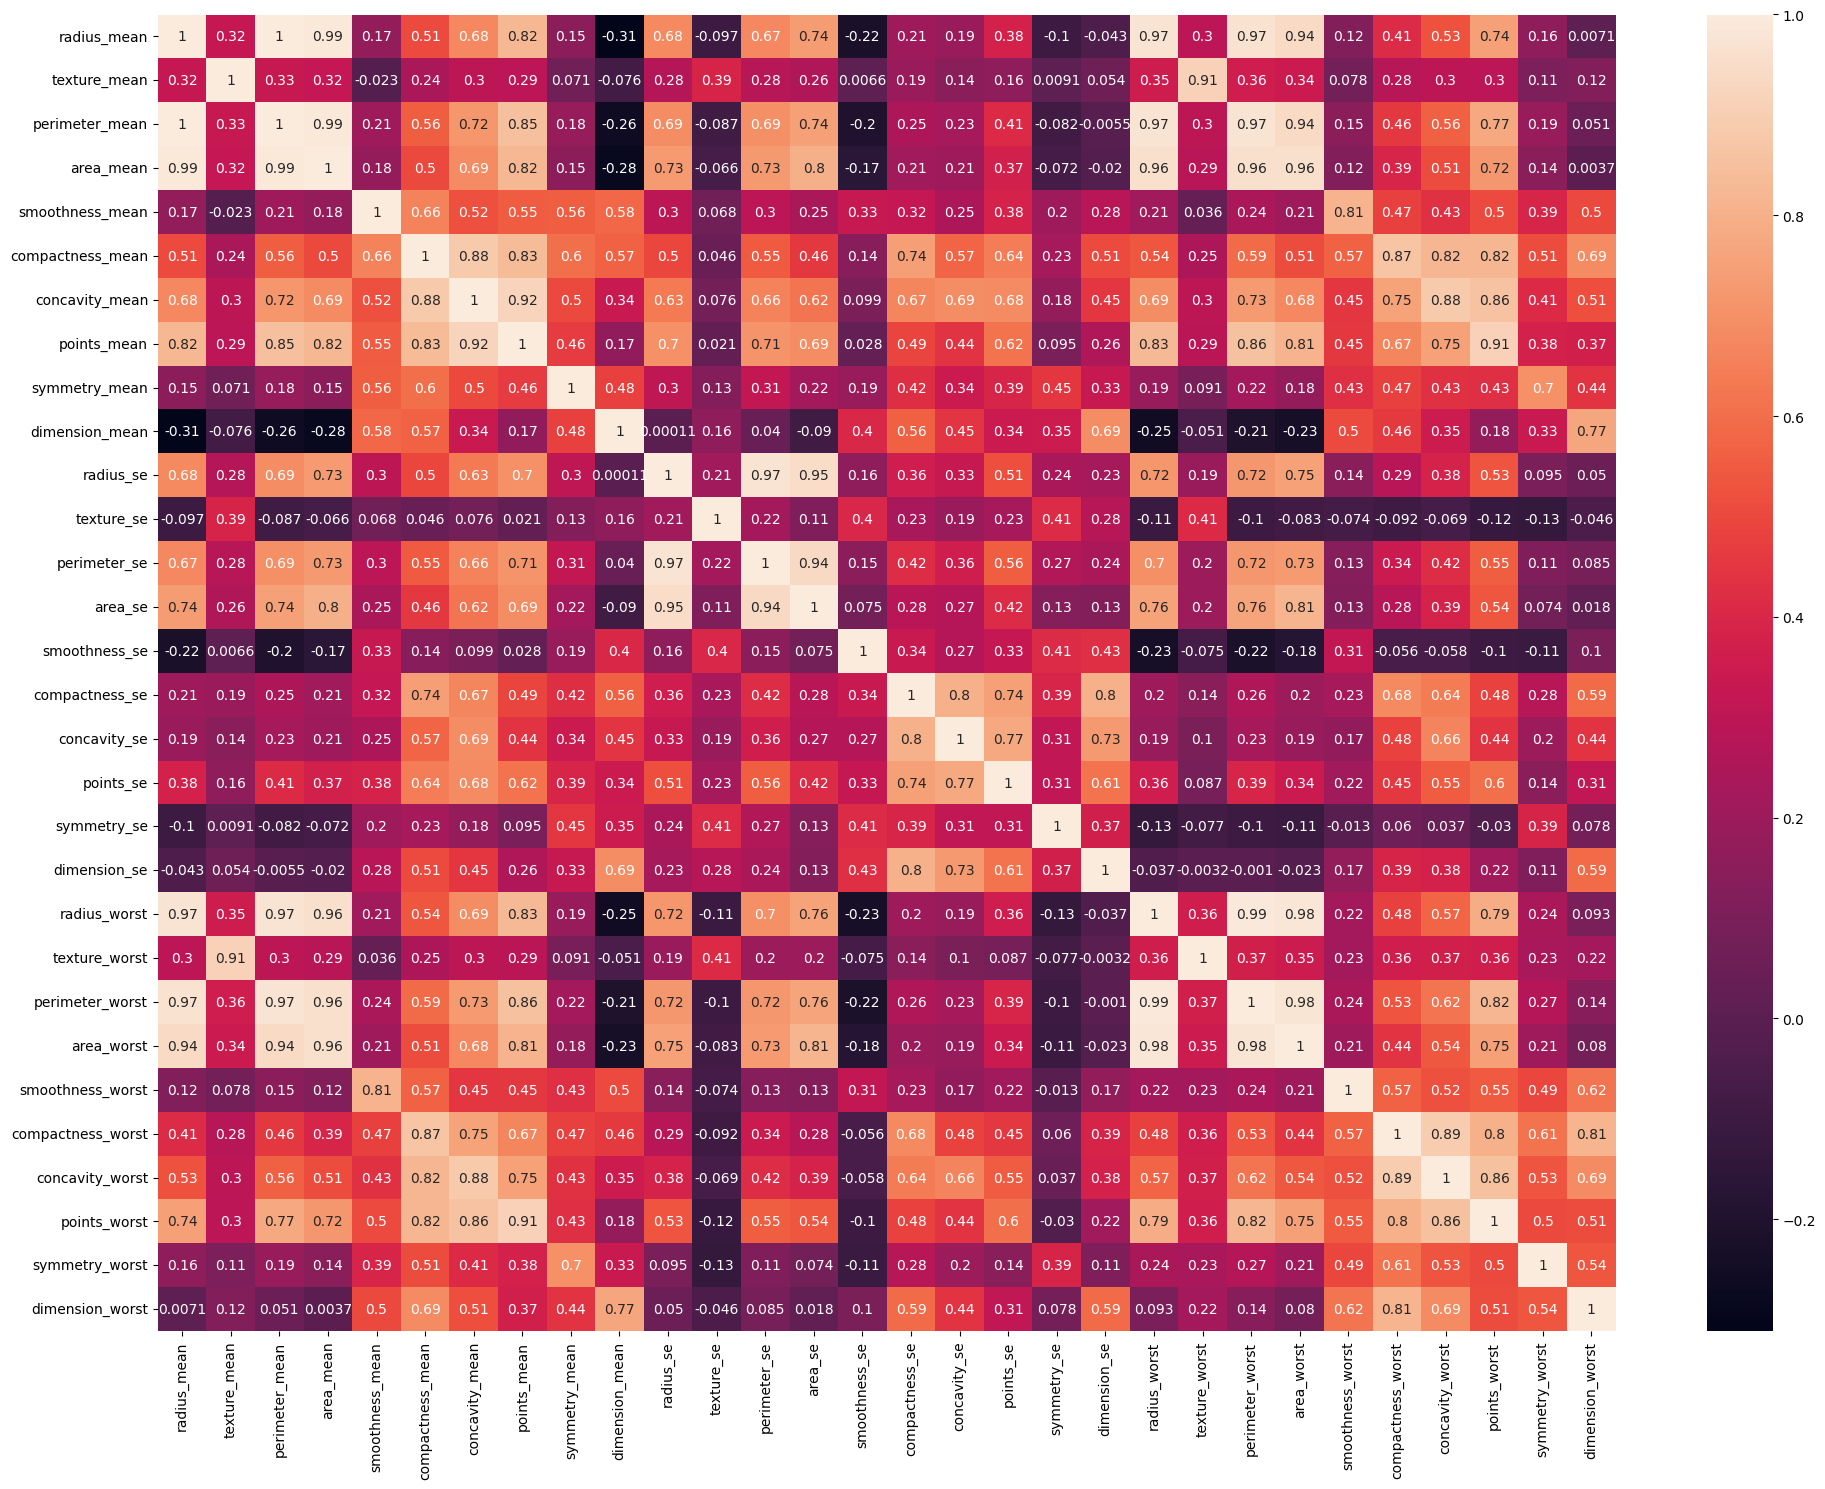

In [59]:
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,1:].corr(),annot=True)
plt.tight_layout()
plt.show()

In [60]:
x=df.iloc[:,1:]
y=df['diagnosis']

In [61]:
x_scale=x.apply(zscore)

In [62]:
x_scale

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.271884,-0.248914,-0.316713,-0.334435,-1.544310,-0.841464,-0.504827,-0.521532,-1.305645,-1.035930,...,-0.283535,-0.291038,-0.362232,-0.339247,-0.182734,-0.367466,-0.405815,-0.153883,-1.077047,-0.814381
565,-1.098366,-1.065715,-1.061432,-0.947908,0.175047,-0.241650,-0.665279,-0.736396,-0.652127,1.028102,...,-1.116007,-1.009179,-1.083347,-0.920238,0.159186,-0.576756,-0.962232,-1.124731,-0.755108,0.051769
566,0.327386,0.726127,0.286312,0.158448,-0.412068,0.016280,-0.440043,-0.420162,-0.308938,0.052790,...,0.317004,0.383135,0.194763,0.162637,-0.099446,0.481144,0.435670,0.121718,0.443667,0.763308
567,0.114375,-1.235591,0.077889,-0.030401,0.963560,-0.225920,-0.249208,0.413500,-0.590060,-0.225060,...,-0.097161,-1.424431,-0.123945,-0.229730,0.102199,-0.677266,-0.647131,-0.117340,-0.476850,-0.323951


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.3,random_state=1)

In [64]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
249,-0.604181,2.080480,-0.626051,-0.604056,-0.853294,-0.755046,-0.605769,-0.760127,-0.717843,-0.249159,...,-0.658355,1.987146,-0.660984,-0.627369,-0.507120,-0.436806,-0.436999,-0.661538,-0.734077,-0.111154
58,2.874993,0.211845,3.057588,3.145893,3.440117,3.455973,4.243589,3.927930,3.079138,0.846648,...,2.019222,-0.274754,2.193393,2.096165,1.632072,1.082296,1.478172,1.677876,0.519703,-0.213673
476,-0.589980,0.798266,-0.544495,-0.588983,-1.922199,0.056078,-0.117631,-0.493675,-2.222032,0.537611,...,-0.766038,0.493869,-0.592774,-0.689424,-1.945375,0.427072,0.091208,-0.082318,-1.148229,0.528899
529,-1.266502,-0.276839,-1.273149,-1.048305,-0.942962,-0.948730,-0.929185,-1.113014,-0.480532,0.187463,...,-1.060095,-0.172162,-1.076794,-0.879630,0.281926,-0.819126,-0.998357,-1.364398,0.252769,-0.287930
422,-0.845593,-1.445027,-0.869073,-0.776409,0.083955,-1.008427,-0.866033,-0.801139,0.067109,-0.247742,...,-0.886145,-1.527023,-0.923695,-0.773100,0.075898,-1.046800,-0.964439,-0.906686,-0.067552,-0.899167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.040531,0.758706,0.074182,-0.071356,0.529451,0.209585,0.721919,0.321673,0.417600,-0.422107,...,-0.202773,1.399280,-0.088202,-0.267700,0.246858,0.121089,0.725441,0.328800,-0.328014,-0.024151
144,0.128576,0.521345,0.224115,-0.028694,0.643316,1.562720,0.674211,1.003666,1.607807,0.913276,...,0.279729,1.226666,0.450921,0.028684,0.882478,2.608395,1.351518,2.367641,2.205430,2.413591
72,-1.444295,-0.090674,-1.313928,-1.167189,0.236249,1.759816,1.364734,0.004149,1.892581,3.491898,...,-1.285815,-0.370832,-1.150961,-1.025712,-0.450133,0.766771,0.905348,-0.001617,0.378956,1.194443
235,-0.695066,-0.725963,-0.678775,-0.666627,1.169940,-0.221940,-0.577646,-0.453952,0.151081,0.171869,...,-0.610726,-0.665579,-0.616305,-0.581488,0.886862,-0.677903,-0.591000,-0.250572,-0.156530,-0.205361


In [65]:
y_train

249    B
58     M
476    B
529    B
422    B
      ..
129    M
144    M
72     B
235    B
37     B
Name: diagnosis, Length: 398, dtype: category
Categories (2, object): ['B', 'M']

In [66]:
x_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
421,0.276263,0.635371,0.217936,0.164705,-0.412780,-0.635462,-0.455360,-0.401848,-0.714193,-0.844553,...,0.379129,0.979143,0.310928,0.262662,0.286310,-0.308942,-0.004742,0.584607,-0.365223,-0.289039
47,3.295334,-0.425771,3.387110,3.854074,1.319387,2.500819,3.113641,3.672569,0.527128,-0.225060,...,3.491579,-0.341520,3.635028,4.137101,0.904396,2.159281,1.789052,2.451387,1.276824,0.232978
292,-0.101476,0.698202,-0.055155,-0.187680,1.682331,0.423736,0.623991,0.421496,0.081713,0.846648,...,0.025018,1.356941,0.129234,-0.129529,1.811799,0.368547,0.521546,0.802347,0.289978,0.520032
186,0.830091,-0.048787,0.882746,0.682900,1.262455,1.001757,1.283127,1.549724,1.166043,0.064131,...,0.687682,-0.128194,0.781544,0.542170,1.662757,0.885093,1.101567,2.127061,0.336894,0.369301
414,-0.678025,-1.226283,-0.730262,-0.647287,-1.297366,-1.154922,-0.833014,-0.549132,1.056515,-0.236401,...,-0.612797,-1.207849,-0.672005,-0.609790,-1.261097,-1.076762,-0.982717,-0.482778,0.323951,-0.945716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,-0.743348,1.079841,-0.718729,-0.714976,-0.266890,-0.042470,0.281240,-0.202977,-1.546608,0.411444,...,-0.784675,1.869899,-0.744086,-0.714386,-0.112597,-0.016317,0.435670,-0.275239,-1.276034,0.186983
487,2.312645,0.088510,2.505640,2.429179,2.579016,3.268353,4.238567,3.440423,2.717694,1.076300,...,2.512079,0.379878,2.964846,2.600686,1.653990,2.833589,3.303630,2.685877,1.867314,0.772728
11,-0.533178,-0.314072,-0.564266,-0.553431,-0.698865,-0.711647,-0.627112,-0.660562,0.578241,-0.073377,...,-0.554813,-0.074456,-0.615412,-0.556174,-0.467667,-0.480063,-0.373672,-0.494807,0.343365,-0.145512
268,-0.533178,0.733108,-0.567973,-0.535798,-1.027649,-0.991939,-0.899681,-0.936557,-0.977060,-0.430613,...,-0.434706,1.027997,-0.432526,-0.452984,-0.296707,-0.469885,-0.715735,-0.780458,0.322334,-0.106167


In [67]:
y_test

421    M
47     M
292    M
186    M
414    B
      ..
6      B
487    M
11     B
268    B
419    M
Name: diagnosis, Length: 171, dtype: category
Categories (2, object): ['B', 'M']

In [68]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

If see 212 people have cancers and 357 people dont have cancers.

In [69]:
model=KNeighborsClassifier(n_neighbors=5,weights='distance')
model.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [70]:
y_hat=model.predict(x_test)
y_hat

array(['M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M'], dtype=object)

In [71]:
model.score(x_test,y_test)

0.9649122807017544

Confusion Matrix


<Axes: >

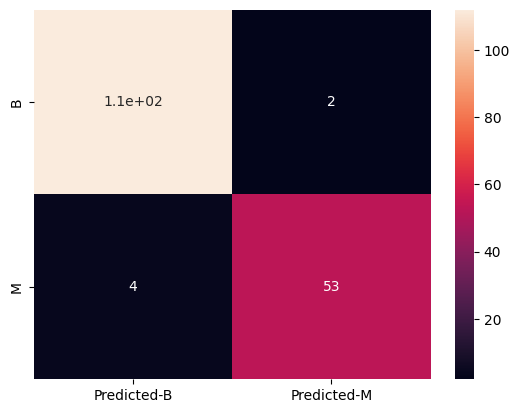

In [73]:
print("Confusion Matrix")
cm=confusion_matrix(y_test,y_hat)
c_matrix=pd.DataFrame(cm,index=['B','M'],columns=['Predicted-B','Predicted-M'])
sns.heatmap(c_matrix,annot=True)

How to choose right K value ? (or)                                                         How to choose no of neighbours ?

In [74]:
score1=[]
for i in range(1,51):
  model=KNeighborsClassifier(n_neighbors=i,weights='distance')
  model.fit(x_train,y_train)
  score1.append(model.score(x_test,y_test))


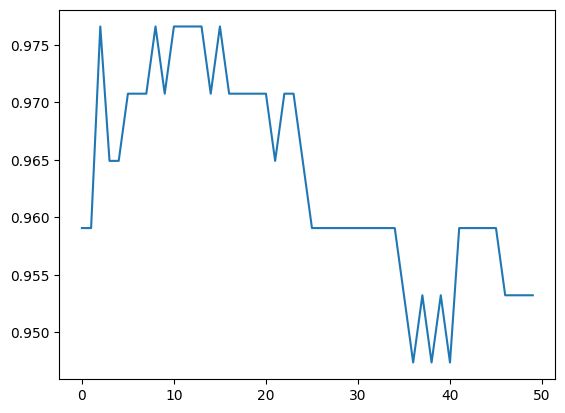

In [75]:
plt.plot(score1)

At K=9 where we can find high accuracy of 0.9766081871345029



In [80]:
model=KNeighborsClassifier(n_neighbors=9,weights='distance')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9766081871345029